<a href="https://colab.research.google.com/github/saha-trideep/Gastronomical-Insights-Analyzing-Zomato-Restaurant-Data-Clustering-Patterns-and-Predicting-Costs/blob/main/Zomato_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Zomato Review** - Sentiment Analysis(Part- EDA & Clustering )

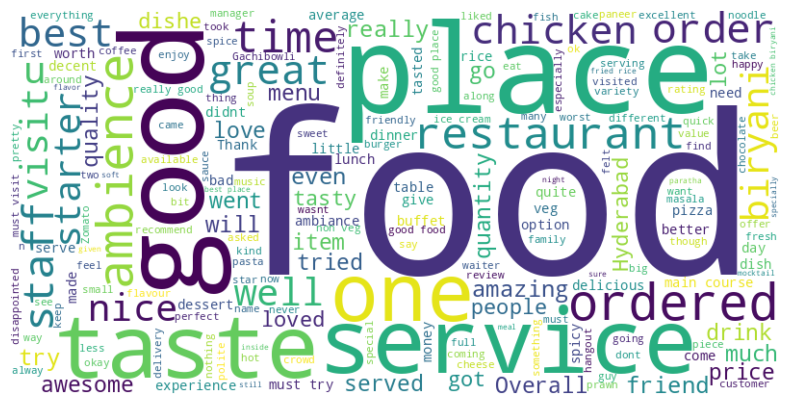

## Features Introduction || Import Libraries

* **Restaurant:** Name of the restaurant.
* **Reviewer:** Name of the reviewer.
* **Review:** Text of the review.
* **Rating:** Numeric rating given by the reviewer.
* **Pictures:** Number of pictures attached to the review.
* **No of Reviews:** Total number of reviews for the restaurant.
* **Category: Category** belongs to single or multiple reviews or post.
* **No of Followers:** Number of followers of the reviewer.
* **Day_of_Week:** Day of the week when the review was posted.
* **Month:** Month when the review was posted.
* **Year:** Year when the review was posted.
* **Links:** Any external links mentioned in the metadata.
* **Cost:** Cost of dining at the restaurant.
* **Cuisines:** Types of cuisines offered by the restaurant.
* **cleaned_review:** Processed and cleaned version of the review text.
* **Length:** Length of the review text in terms of characters.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


## Load Data

In [ ]:
df1 = pd.read_csv("/content/Zomato Restaurant reviews.csv")
df2 = pd.read_csv("/content/Zomato Restaurant names and Metadata.csv")

In [ ]:
print("Restuarant Review\n", df1.head())
print('\n')
print("Restuarant names and Metadata\n", df2.head())

Restuarant Review
         Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0  



## Restuarant Reviews

In [ ]:
df1.shape

(10000, 7)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


### NaN Values

In [ ]:
df1.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [ ]:
# Let's look a little closer at the rows that have missing values
missing_values_df1 = df1[df1.isnull().any(axis=1)]
print("Total rows", missing_values_df1.shape[0])

print("Rows with missing values in Dataset 1:")
print(missing_values_df1)

Total rows 45
Rows with missing values in Dataset 1:
               Restaurant                Reviewer Review Rating  \
2360                 Amul        Lakshmi Narayana    NaN      5   
5799         Being Hungry                   Surya    NaN      5   
6449      Hyderabad Chefs          Madhurimanne97    NaN      5   
6489      Hyderabad Chefs                  Harsha    NaN      5   
7954         Olive Garden  ARUGULLA PRAVEEN KUMAR    NaN      3   
8228   Al Saba Restaurant                  Suresh    NaN      5   
8777  American Wild Wings                     NaN    NaN    NaN   
8778  American Wild Wings                     NaN    NaN    NaN   
8779  American Wild Wings                     NaN    NaN    NaN   
8780  American Wild Wings                     NaN    NaN    NaN   
8781  American Wild Wings                     NaN    NaN    NaN   
8782  American Wild Wings                     NaN    NaN    NaN   
8783  American Wild Wings                     NaN    NaN    NaN   
8784  Ame

**Thought:** We can see here some indexes have all missing values except 'Restaurant' column so first we will deal with them,
we can just filter out with `notnull()` method to remove rows where all specified columns `(excluding 'Restaurant')` are null.

In [ ]:
# Filter data set on 'Review' because maximum NaN is in this column
selected_column = 'Review'
df1_cleaned = df1[df1[selected_column].notnull()]

In [ ]:
df1_cleaned.shape

(9955, 7)

In [ ]:
df1_cleaned.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

### Duplicate Values

In [ ]:
for column in df1_cleaned.columns:
  res_uni = df1_cleaned[column].nunique()
  res_dup = df1_cleaned[column].duplicated().sum()
  print(f"{column} column unique value count: {res_uni}")
  print(f"{column} column duplicate value count: {res_dup}\n")

Restaurant column unique value count: 100
Restaurant column duplicate value count: 9855

Reviewer column unique value count: 7442
Reviewer column duplicate value count: 2513

Review column unique value count: 9364
Review column duplicate value count: 591

Rating column unique value count: 10
Rating column duplicate value count: 9945

Metadata column unique value count: 2477
Metadata column duplicate value count: 7478

Time column unique value count: 9775
Time column duplicate value count: 180

Pictures column unique value count: 36
Pictures column duplicate value count: 9919



In [ ]:
duplicated_rows = df1_cleaned[df1_cleaned.duplicated(keep=False)]
# Display the duplicated rows
duplicated_rows.shape

(0, 7)

**Note:** It's a valid observation that a reviewer may review a restaurant multiple times, and this is a common scenario in datasets related to user reviews. It's important to distinguish between row-wise duplicates but here we have `zero`.

### Splitting Columns | dtype

In [ ]:
pd.options.mode.copy_on_write = True
# Split 'Metadata' column on " " and create new columns -> |1 | Review | , | 2 | Followers |
df1_cleaned[['column1', 'column2', 'column3', 'column4', 'column5']] =\
               df1_cleaned['Metadata'].str.split(" ", n=-1, expand=True)

In [ ]:
# Drop non essential columns
columns = ['column3', 'column5', 'Metadata']
df1_cleaned.drop(columns, axis=1, inplace=True)

In [ ]:
# Let's rename our new columns
column_name_mapping = {
    'column1': 'No of Reviews',
    'column2': 'Category',
    'column4': 'No of Followers'
}
df1_cleaned.rename(columns=column_name_mapping, inplace=True)

In [ ]:
# Let's split 'Time' column in the same way
df1_cleaned[['Date', 'Review Time']] = df1_cleaned['Time'].str.split(" ", n=-1, expand=True)

In [ ]:
# Drop our 'Time' column
df1_cleaned.drop(columns='Time', axis=1, inplace=True)

In [ ]:
# Filled NaN values
df1_cleaned.fillna({'No of Followers': 0}, inplace=True)

In [ ]:
# Convert to int64
df1_cleaned['No of Followers'] = df1_cleaned['No of Followers'].astype('int64')


In [ ]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant       9955 non-null   object
 1   Reviewer         9955 non-null   object
 2   Review           9955 non-null   object
 3   Rating           9955 non-null   object
 4   Pictures         9955 non-null   int64 
 5   No of Reviews    9955 non-null   object
 6   Category         9955 non-null   object
 7   No of Followers  9955 non-null   int64 
 8   Date             9955 non-null   object
 9   Review Time      9955 non-null   object
dtypes: int64(2), object(8)
memory usage: 855.5+ KB


In [ ]:
# Convert into float and int64

df1_cleaned['Rating'] = pd.to_numeric(df1_cleaned['Rating'], errors='coerce')
df1_cleaned['No of Reviews'] = df1_cleaned['No of Reviews'].astype('int64')

### 'Date' Column

In [ ]:
# Convert into datetime

df1_cleaned['Date'] = pd.to_datetime(df1_cleaned['Date'], errors='coerce')


In [ ]:
# Extract relevant information from the 'Date' column

df1_cleaned['Day_of_Week'] = df1_cleaned['Date'].dt.day_name()
df1_cleaned['Month'] = df1_cleaned['Date'].dt.month
df1_cleaned['Year'] = df1_cleaned['Date'].dt.year

In [ ]:
df1_cleaned.drop(columns=['Review Time', 'Date'], axis=1, inplace=True)


In [ ]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant       9955 non-null   object 
 1   Reviewer         9955 non-null   object 
 2   Review           9955 non-null   object 
 3   Rating           9954 non-null   float64
 4   Pictures         9955 non-null   int64  
 5   No of Reviews    9955 non-null   int64  
 6   Category         9955 non-null   object 
 7   No of Followers  9955 non-null   int64  
 8   Day_of_Week      9955 non-null   object 
 9   Month            9955 non-null   int64  
 10  Year             9955 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 933.3+ KB


So far all the new features we have found are from our first data set `df1`

**No of Reviews**: Total number of reviews for the restaurant.

**Category**: Category belongs to single or multiple reviews or post.

**No of Followers**: Number of followers of the reviewer.

**Day_of_Week**: Day of the week when the review was posted.

**Month**: Month when the review was posted.

**Year**: Year when the review was posted.

**Note**: A NAN value still remains in the `Rating` column

---

Here we will merge two data sets and do some visualization on them so that we can have an overview of the entire data set and we can understand what kind of tendency our data have.

---

## Merge Two Data Frames

In [ ]:
# Our first interest is to change the dtype of 'Cost' column

"""
apply() is used to apply function on each element of 'Cost' column.
The lambda function is applied to each element (x) in the 'Cost' column.
float(x.replace(',', '.')) replaces the comma with a dot and converts the result to a float.
if pd.notna(x) else x is used to handle NaN values. If the value is NaN,
it remains NaN after the conversion.
"""
df2['Cost'] = df2['Cost'].apply(lambda x: float(x.replace(',', '.')) if pd.notna(x) else x)

In [ ]:
df  = df1_cleaned.merge(df2, left_on=['Restaurant'], right_on=['Name'], how='left')

In [ ]:
# Droping 'Collections' and 'Timings' column
df.drop(columns=['Collections', 'Timings', 'Name'], axis=1, inplace=True)

In [ ]:
# Filling a NaN value in the 'Rating' column
mean_rating = df['Rating'].mean()
df.fillna({'Rating':mean_rating}, inplace=True )


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9954
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant       9955 non-null   object 
 1   Reviewer         9955 non-null   object 
 2   Review           9955 non-null   object 
 3   Rating           9955 non-null   float64
 4   Pictures         9955 non-null   int64  
 5   No of Reviews    9955 non-null   int64  
 6   Category         9955 non-null   object 
 7   No of Followers  9955 non-null   int64  
 8   Day_of_Week      9955 non-null   object 
 9   Month            9955 non-null   int64  
 10  Year             9955 non-null   int64  
 11  Links            9955 non-null   object 
 12  Cost             9955 non-null   float64
 13  Cuisines         9955 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


**What we have done so far?**

* We deal our first dataset's **NaN** values by applying the `notnull()` method on the `Reviewer` column.

* We filled up the rest **NaN** values in the ` Review` column with our own text input.
* We split the `Metadata` & `Time` columns and extracted some necessary columns from there like **No of Reviews** | **No of Followers** | **Month** | **Year** and more.
* We droped some columns from our second dataset so that we don't have any complications. Because our main objective here is to classify the data and how much important information we can extract it by sentiment analysis.
* We changed the `dtype` of both our datasets to the features we need for that.
* We merge both datasets by applying `merge` method on first dataset by specified `left` on second dataset's `Name` column.

* Finally. our final `df` consisted **13 columns** and **9962 not-null** value rows and we'll do next operation with this.  


In [ ]:
df.describe()

,Rating,Pictures,No of Reviews,No of Followers,Month,Year,Cost
count,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000,9955.000000
mean,3.600261,0.751984,24.006730,163.108086,6.016976,2018.452436,348.845907
std,1.483498,2.575691,50.629274,620.153289,3.160373,0.562564,306.296850
min,1.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,1.000000
25%,3.000000,0.000000,1.000000,1.000000,4.000000,2018.000000,1.500000
50%,4.000000,0.000000,4.000000,7.000000,5.000000,2018.000000,400.000000
75%,5.000000,0.000000,22.000000,63.000000,8.000000,2019.000000,600.000000
max,5.000000,64.000000,1031.000000,13410.000000,12.000000,2019.000000,900.000000


In [ ]:
# Filter data for the costs less than 5 rupees
low_cost_data = df[df['Cost'] < 5]

# Display the number of restaurants with cost less than 5
print(f"The number of Restaurants Whose Cost is less than 5:")
print(low_cost_data.shape[0])

# Display a sample of unique restaurant names with cost less than 5 rupees
print("\nSample Unique Restaurant Names, Rating & Cost with Cost Less than 5:")
sample_unique_restaurant_names = low_cost_data[['Restaurant', 'Rating', 'Cost']]\
                                                  .drop_duplicates()\
                                                  .sample(n=5, random_state=42)
print(sample_unique_restaurant_names)

The number of Restaurants Whose Cost is less than 5:
3685

Sample Unique Restaurant Names, Rating & Cost with Cost Less than 5:
                      Restaurant  Rating  Cost
7234                     Labonel     4.5   1.0
800                  Hyper Local     4.0   1.0
3102                 Pista House     3.0   1.0
4419  La La Land - Bar & Kitchen     2.0   1.0
7796                  Khaan Saab     4.0   1.1


Before proceding with the analysis, I wanted to bring this to your attention and seek clarification regarding these 'Cost' values.

I am quite skeptical about this as I don't think any such restaurant can have any dish for less than five rupees.

A conversation with the client will allow us to align on the most appropriate steps moving forward. This may include adjustments to the data, exclusion of outliers, or maintaining the values as they are. But for now we leave it as it is.

## Visualization

### Distribution Plots

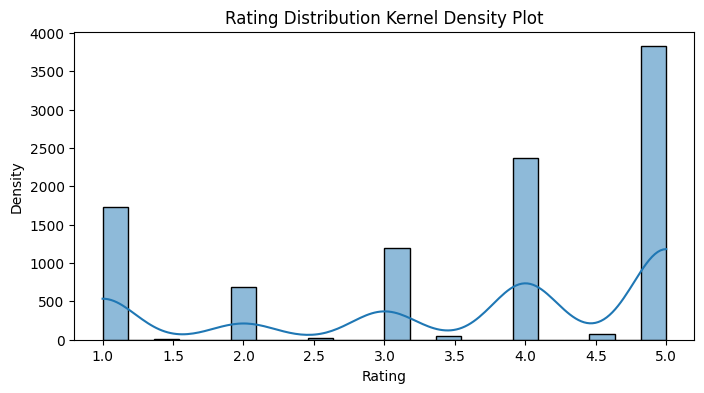

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rating Distribution Kernel Density Plot
plt.figure(figsize=(8, 4))
sns.histplot(df['Rating'], kde=True)
plt.xlabel("Rating")
plt.ylabel("Density")
plt.title("Rating Distribution Kernel Density Plot")
plt.show()

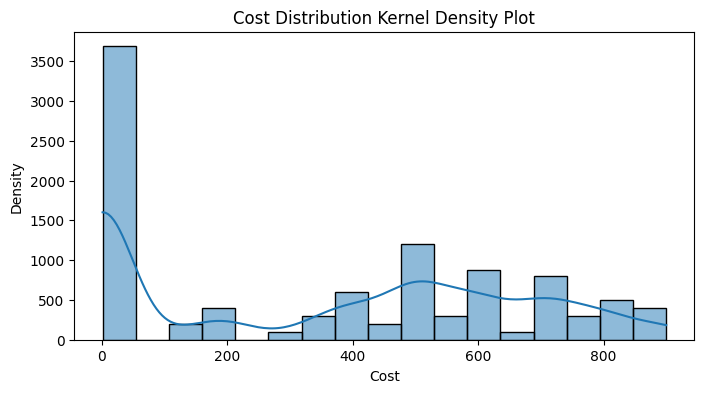

In [ ]:
# Cost Distribution Kernel Density Plot
plt.figure(figsize=(8, 4))
sns.histplot(df['Cost'], kde=True)
plt.xlabel("Cost")
plt.ylabel("Density")
plt.title("Cost Distribution Kernel Density Plot")
plt.show()

### Category Distribution

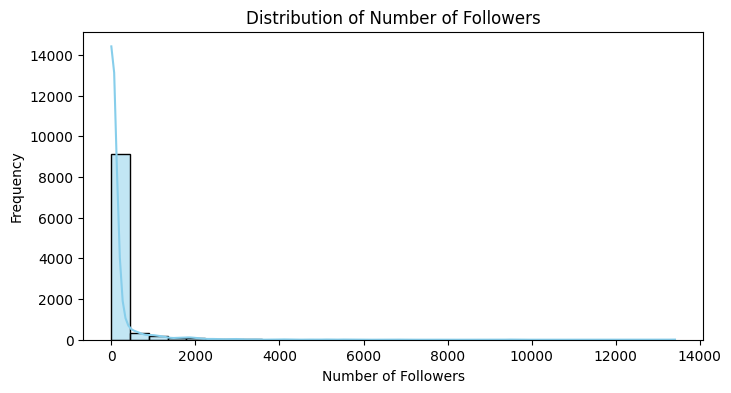

In [ ]:
# Histogram for Number of Followers Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['No of Followers'], bins=30, kde=True, color='skyblue')
plt.xlabel("Number of Followers")
plt.ylabel("Frequency")
plt.title("Distribution of Number of Followers")
plt.show()

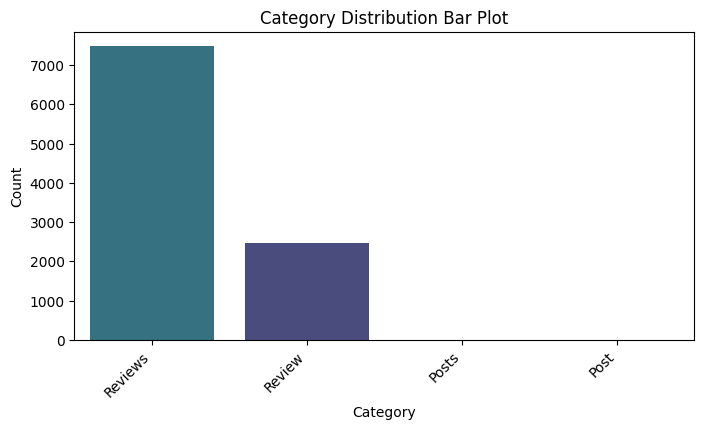

In [ ]:
# Category Distribution Bar Plot
plt.figure(figsize=(8, 4))
sns.countplot(x='Category', data=df,
              palette='viridis',
              hue='Category',
              order=df['Category'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Category Distribution Bar Plot")
plt.show()

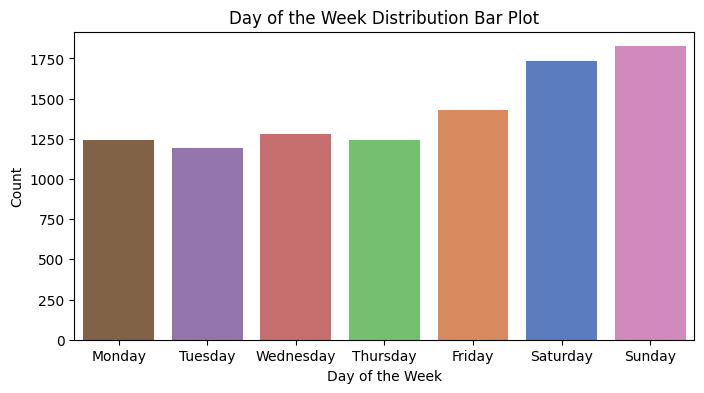

In [ ]:
# Day of the Week Distribution Bar Plot
plt.figure(figsize=(8, 4))
sns.countplot(x='Day_of_Week', data=df, palette='muted',
              hue='Day_of_Week',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                     'Friday', 'Saturday', 'Sunday'])
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.title("Day of the Week Distribution Bar Plot")
plt.show()

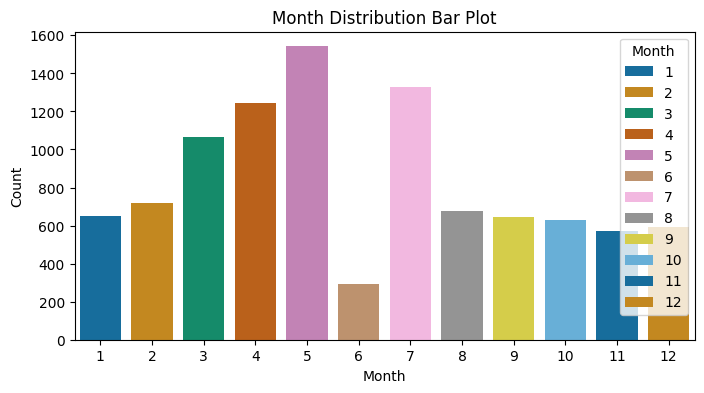

In [ ]:
# Month Distribution Bar Plot
plt.figure(figsize=(8, 4))
sns.countplot(x='Month',
              data=df, palette='colorblind',
              hue='Month',order=range(1, 13))
plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Month Distribution Bar Plot")
plt.show()

### Relationship Plots

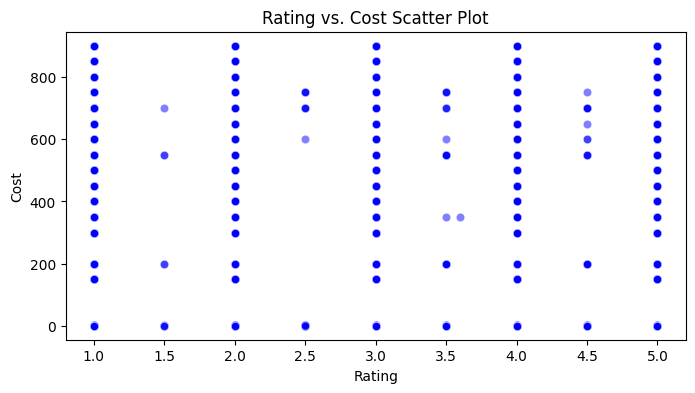

In [ ]:
# Rating vs. Cost Scatter Plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Rating', y='Cost',
                data=df, color='blue',
                alpha=0.5)
plt.xlabel("Rating")
plt.ylabel("Cost")
plt.title("Rating vs. Cost Scatter Plot")
plt.show()

### Time Series

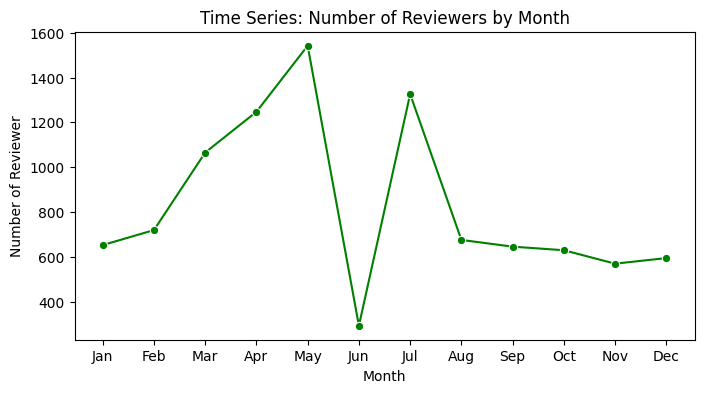

In [ ]:
# Create a new DataFrame with the count of reviews or ratings by month
time_series_df = df.groupby('Month')['Reviewer'].count().reset_index()

# Time Series Line Plot
plt.figure(figsize=(8, 4))
sns.lineplot(x='Month', y='Reviewer',
             data=time_series_df, marker='o',
             color='green')
plt.xlabel("Month")
plt.ylabel("Number of Reviewer")
plt.title("Time Series: Number of Reviewers by Month")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr',
                          'May', 'Jun', 'Jul', 'Aug', 'Sep',
                          'Oct', 'Nov', 'Dec'])
plt.show()

### Correlation Matrix

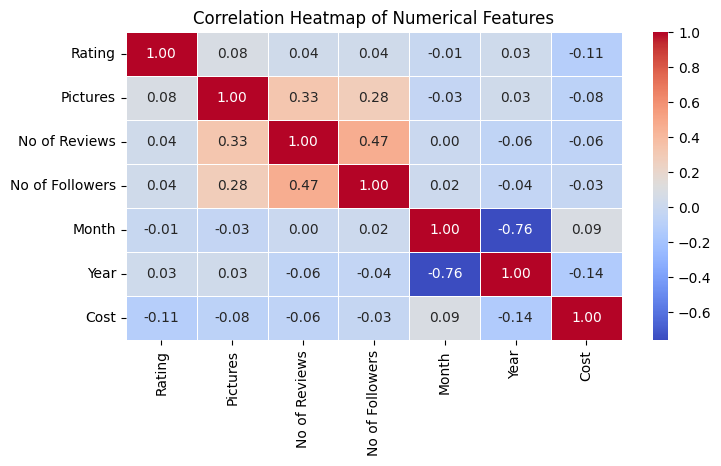

In [ ]:
# Select numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix,
            annot=True, cmap='coolwarm',
            fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Top Restaurant Names that Depends on Other Features

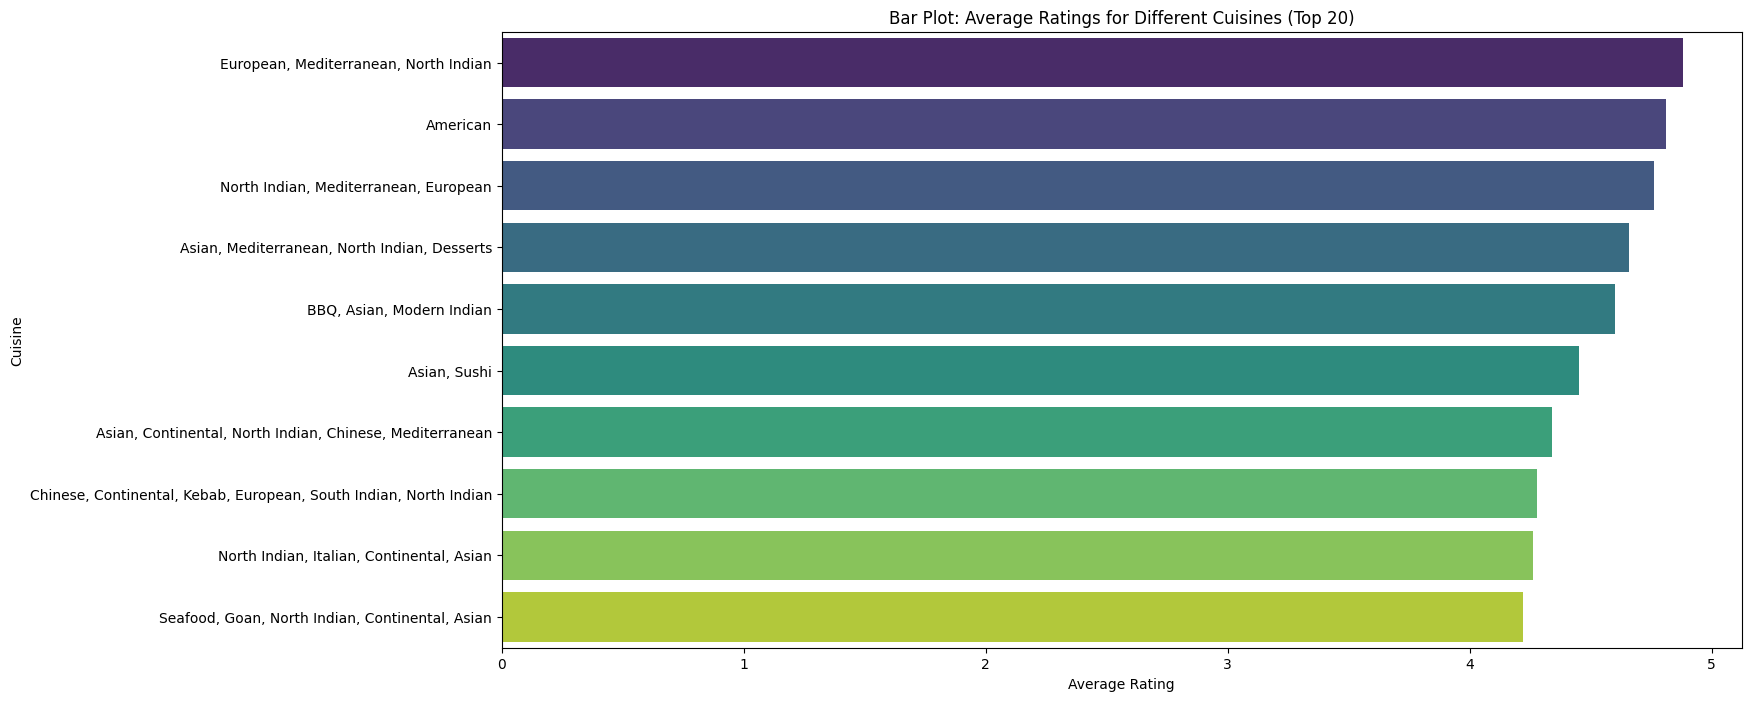

In [ ]:
# Bar Plot for Cuisine vs. Average Rating
average_rating_by_cuisine = df.groupby('Cuisines')['Rating'].mean()\
                                    .sort_values(ascending=False).reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x='Rating', y='Cuisines',
            hue='Cuisines',
            data=average_rating_by_cuisine.head(10),
            palette='viridis')

plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.title("Bar Plot: Average Ratings for Different Cuisines (Top 20)")
plt.show()

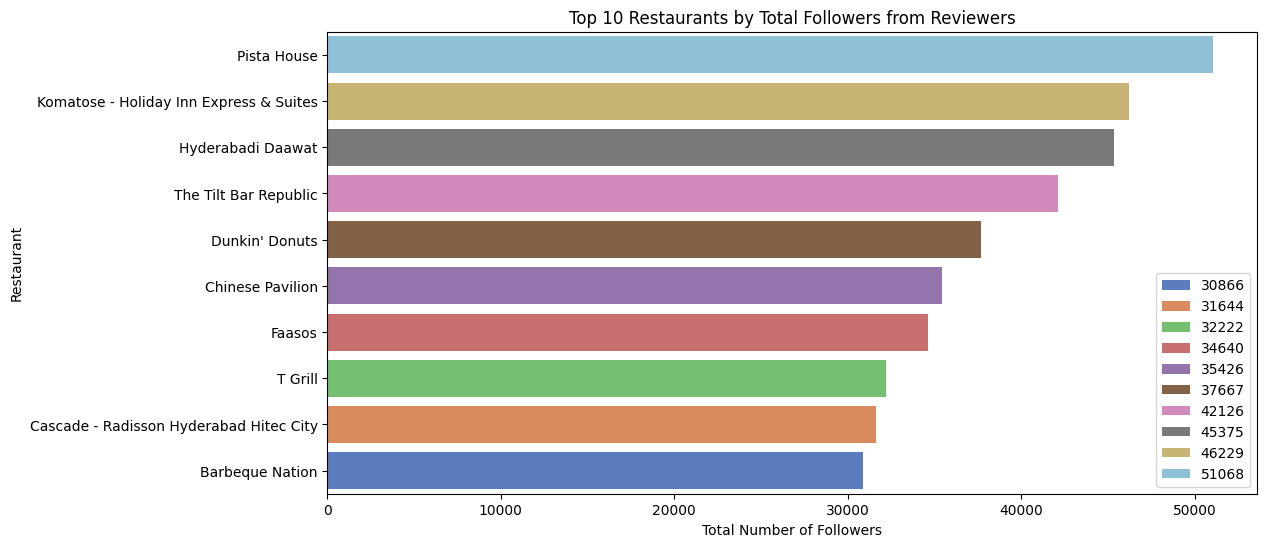

In [ ]:
# Find the top 10 restaurants with the maximum total number of followers from reviewers
top_followed_restaurants = df.groupby('Restaurant')['No of Followers'].\
                                    sum().sort_values(ascending=False).head(10)

# Bar Plot for Top 10 Restaurants by Total Followers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_followed_restaurants.values,
            y=top_followed_restaurants.index,
            hue=top_followed_restaurants.values,
            palette='muted')

plt.xlabel("Total Number of Followers")
plt.ylabel("Restaurant")
plt.title("Top 10 Restaurants by Total Followers from Reviewers")
plt.show()

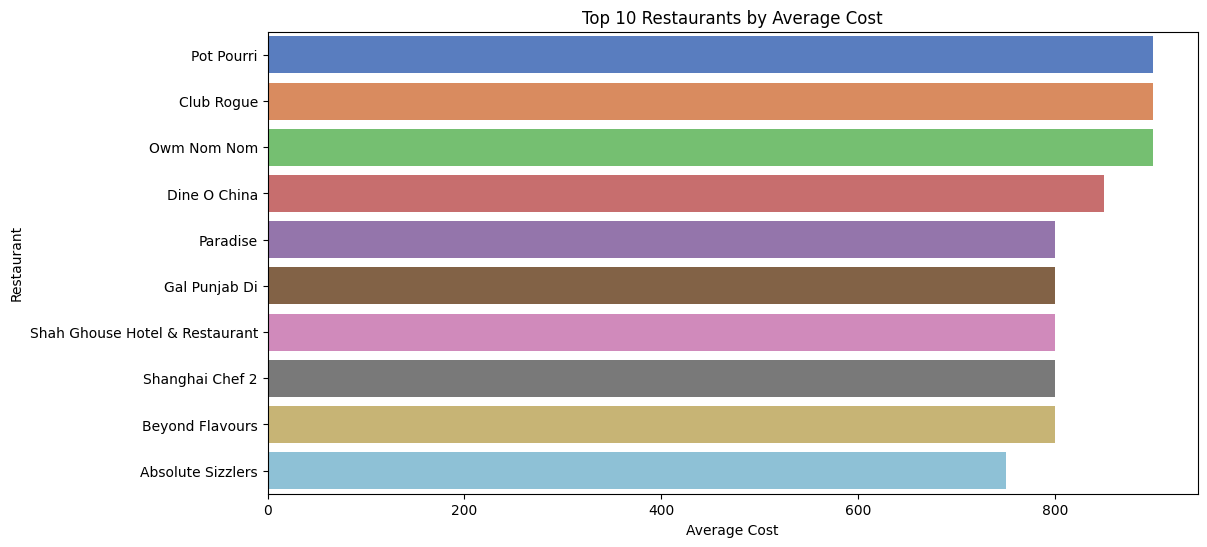

In [ ]:
# Calculate the average cost for each restaurant
average_cost_by_restaurant = df.groupby('Restaurant')['Cost'].\
                                    mean().sort_values(ascending=False)

# Bar Plot for Top 10 Restaurants by Average Cost
plt.figure(figsize=(12, 6))
sns.barplot(x=average_cost_by_restaurant.head(10).values,
            y=average_cost_by_restaurant.head(10).index,
            hue=average_cost_by_restaurant.head(10).index,
            palette='muted')
plt.xlabel("Average Cost")
plt.ylabel("Restaurant")
plt.title("Top 10 Restaurants by Average Cost")
plt.show()

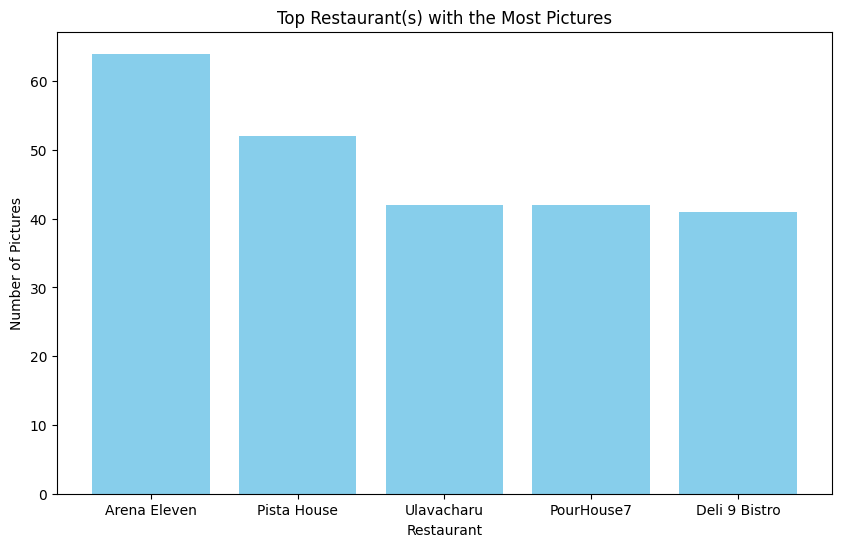

In [ ]:
# Find the restaurant(s) with the most pictures
top_pictures_restaurants = df.sort_values(by='Pictures', ascending=False).head(5)

# Bar Plot for the Number of Pictures
plt.figure(figsize=(10, 6))
plt.bar(top_pictures_restaurants['Restaurant'],
        top_pictures_restaurants['Pictures'],
        color='skyblue')

plt.xlabel("Restaurant")
plt.ylabel("Number of Pictures")
plt.title("Top Restaurant(s) with the Most Pictures")
plt.show()

## Overview Our Visualization

* The median cost is likely around Rs- 500, as the density curve is highest around that point.

* There are a few kennels that cost much more than Rs- 500, as the tail of the distribution extends to the right.

* The strongest positive correlations are between the number of reviews and the number of followers (0.47), and between pictures and cost (-0.6).

* The strongest negative correlations are between month and year (-0.76), and between month and cost (0.09).

* The general trend is that there is a positive correlation between cost and rating. This means that, as the cost of a product goes up, its rating also tends to go up. However, there is also a lot of scatter in the data, which means that there are many dishes that don't follow this trend. For example, there are some expensive products that have low ratings, and some inexpensive products that have high ratings.

* The traffic is highest in saturday and sunday. This could be because people are more likely to go restaurants on holidays, when they have more time to spend.


* The number of reviewers increases in July and August. This could be because people are on vacation in the summer months, and they have more time to write reviews.


* Here are the names of the restaurants, from least expensive to most expensive:

* Pot Pourri

* Club Rogue

* Owm Nom Nom


* Shanghai Chef 2

* Beyond Flavours

* Absolute Sizzlers

---

So we understand from the above overview that comparison analysis is not able to give us some specific information like that and we need to cluster it a bit then we can start our in depth analysis.

---


### Scatter plots for all pairs of numerical features in the entire dataset

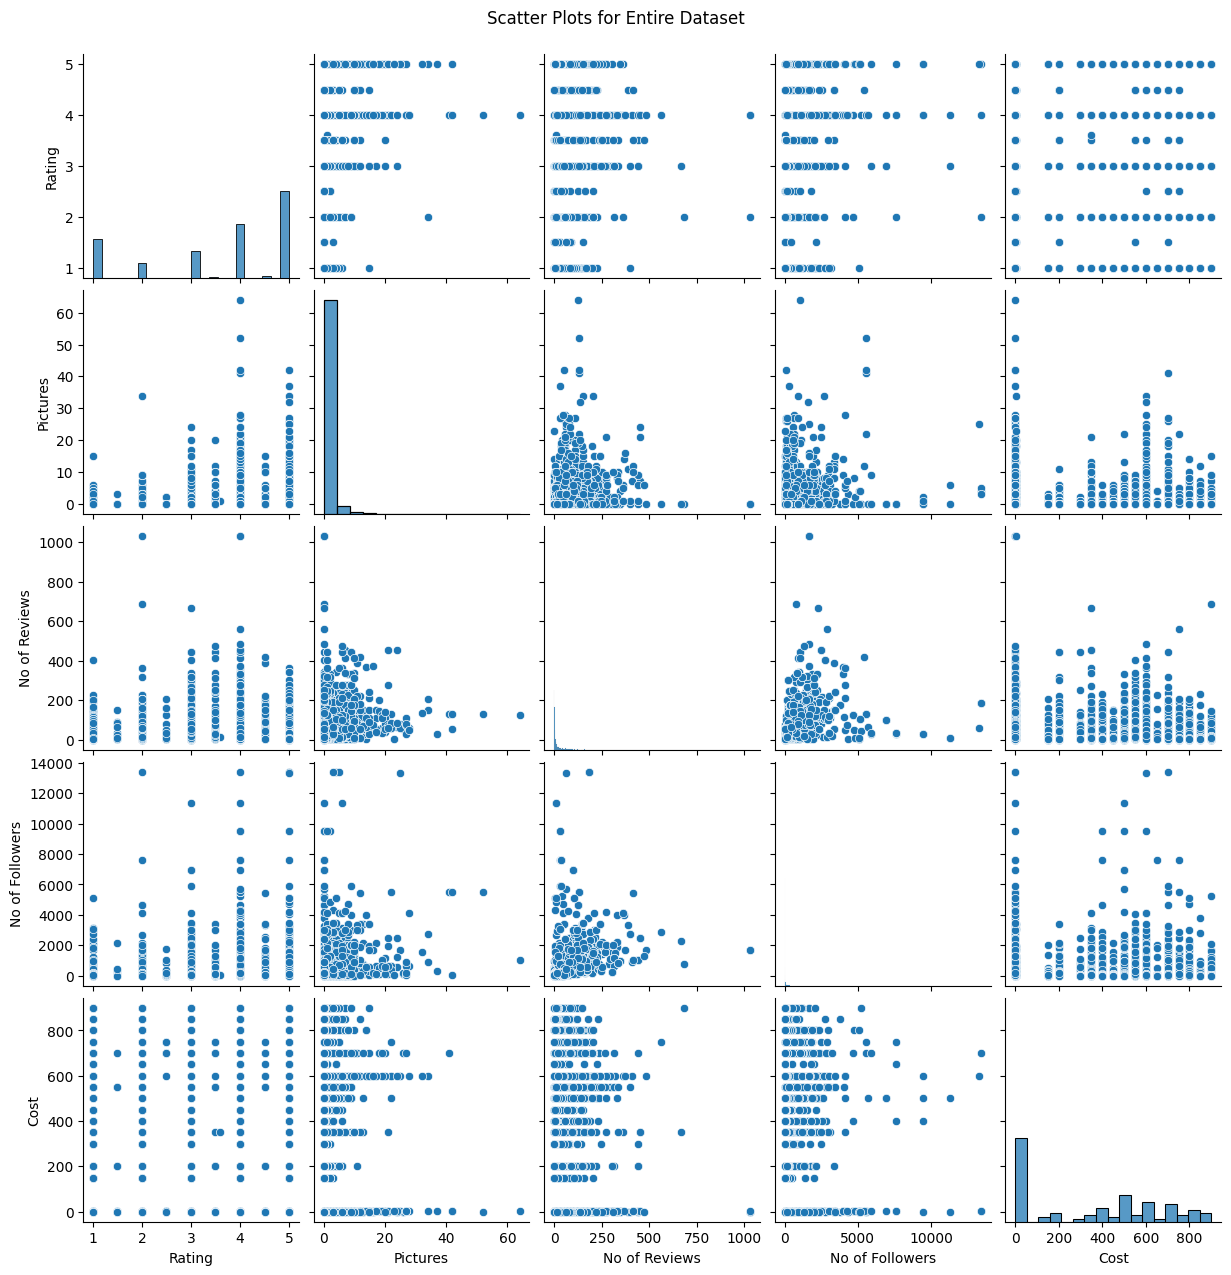

In [ ]:
numerical_features = ['Rating', 'Pictures', \
                      'No of Reviews', 'No of Followers', 'Cost']

# Create scatter plot or pair plot for the entire dataset
sns.pairplot(df[numerical_features])
plt.suptitle('Scatter Plots for Entire Dataset', y=1.02)
plt.show()

In [ ]:
df[numerical_features].corr()

,Rating,Pictures,No of Reviews,No of Followers,Cost
Rating,1.000000,0.082834,0.035254,0.035637,-0.111507
Pictures,0.082834,1.000000,0.330850,0.284648,-0.075733
No of Reviews,0.035254,0.330850,1.000000,0.465631,-0.060973
No of Followers,0.035637,0.284648,0.465631,1.000000,-0.028288
Cost,-0.111507,-0.075733,-0.060973,-0.028288,1.000000


# **Key**

**Positive Correlations**:

*Moderate*:

Pictures and Number of Reviews (r = 0.33)

Pictures and Number of Followers (r = 0.28)

Number of Reviews and Number of Followers (r = 0.47)

**Mild Correlations**:

Rating and Pictures (r = 0.08)

Rating and Number of Reviews (r = 0.04)

Rating and Number of Followers (r = 0.04)

**Negative Correlations**:

*Weak*:

Rating and Cost (r = -0.11)

Pictures and Cost (r = -0.08)

Number of Reviews and Cost (r = -0.06)

Number of Followers and Cost (r = -0.03)

**Key Observations**:

The strongest correlations involve the Number of Reviews, which is moderately correlated with both Pictures and Number of Followers of the Reviewers.

Cost has weak negative correlations with all other features.
Rating has only mild positive correlations with other features. This could suggest that other factors besides inherent quality also influence factors like reviews and pictures, user activity and engagement (e.g., promotions)

## Further Exploration
We will go with clustering and apply algorithms (e.g., K-Means) to group restaurants based on multiple features, including cost and analyze the characteristics of each cluster.

---

### **Here are a few popular clustering algorithms and considerations for each algorithm**

Determining the optimal number of clusters (k) in KMeans clustering

Elbow Method

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = df[['Rating', 'Pictures', 'No of Reviews',
                       'No of Followers', 'Cost']]

#standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

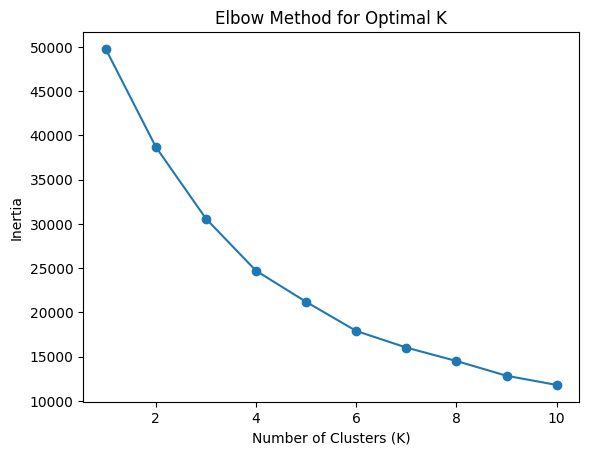

In [ ]:
inertia = []

for k in range(1, 11):
  Kmeans = KMeans(n_clusters=k, n_init=10, init='k-means++', random_state=42)
  Kmeans.fit(features_scaled)
  inertia.append(Kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

* Based on the plot, it seems that the optimal number of clusters is 6. This is the point where the inertia starts to level off, indicating that adding more clusters doesn't significantly improve the fit of the clusters to the data.

* The **elbow method** is just one way to determine the optimal number of clusters. There are other methods, such as the **silhouette coefficient**, that we can also use.

Silhouette coefficient

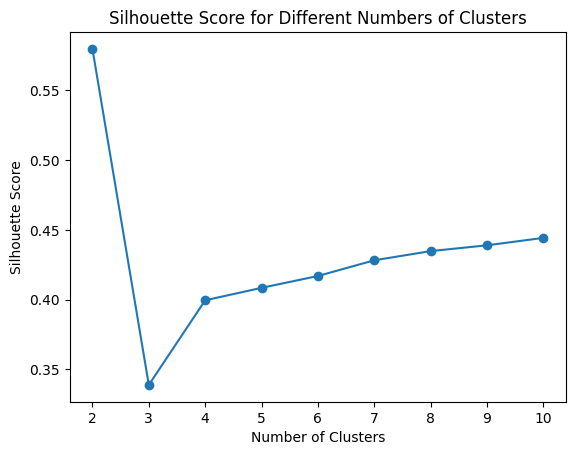

In [ ]:
from sklearn.metrics import silhouette_score
cluster_range = range(2, 11)

# List to store silhouette scores
silhouette_scores = []

for k in cluster_range:
  kmeans = KMeans(n_clusters=k, n_init=10, init='k-means++', random_state=42)
  cluster_labels = kmeans.fit_predict(features_scaled)
  silhouette_avg = silhouette_score(features_scaled, cluster_labels)
  silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.show()

**Potential optimal values**

There are two potential points for the optimal number of clusters based on the silhouette coefficient:

* K=4: This is where the silhouette coefficient reaches its first highest value (around 0.40). This suggests that 4 clusters might be a good choice if we prioritize maximizing the average silhouette score.

* K=6 or 7: The silhouette coefficient remains relatively high around 0.40-0.45 for these values. So the interpretability of clusters or the granularity are important, these could be better options as they capture more subgroups in the data while still maintaining a decent silhouette score.

KMeans | MeanShift | GaussianMixture

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture

Calculates the **Davies-Bouldin Index (DBI)**,

which is a metric used for evaluating the performance of clustering algorithms.

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# Davies-Bouldin Index
def compute_davies_bouldin(X, labels):
  n_clusters = len(set(labels))
  cluster_centers = np.array([np.mean(X[labels == j], axis=0)\
                              for j in range(n_clusters)])

  S = np.zeros(n_clusters)
  R = np.zeros((n_clusters, n_clusters))

  for i in range(n_clusters):
    S[i] = np.mean([euclidean_distances(X[labels == i], [cluster_centers[i]])])

  for i in range(n_clusters):
    for j in range(n_clusters):
        if i != j:
            R[i, j] = (S[i] + S[j]) / \
            euclidean_distances([cluster_centers[i]], [cluster_centers[j]])

  DB = np.sum(np.max(R, axis=1)) / n_clusters
  return DB

In [ ]:
# define the models
kmeans_model = KMeans(n_clusters=4) # Optimal Number 4
mean_model = MeanShift()
gaussian_model = GaussianMixture(n_components=4, n_init=10)

In [ ]:
# train the model
kmeans_model.fit(features_scaled)
gaussian_model.fit(features_scaled)

GaussianMixture(n_components=4, n_init=10)

In [ ]:
# assign each data point to a cluster
kmeans_result = kmeans_model.predict(features_scaled)
mean_result = mean_model.fit_predict(features_scaled)
gaussian_result = gaussian_model.predict(features_scaled)

Silhouette Score & Davies-Bouldin Index for each Cluster Algorithm

In [ ]:
silhouette_kmeans = silhouette_score(features_scaled, kmeans_result)
silhouette_mean = silhouette_score(features_scaled, mean_result)
silhouette_gaussian = silhouette_score(features_scaled, gaussian_result)

print(f"Silhouette Score (KMeans): {silhouette_kmeans}")
print(f"Silhouette Score (MeanShift): {silhouette_mean}")
print(f"Silhouette Score (GaussianMixture): {silhouette_gaussian}")

Silhouette Score (KMeans): 0.39953422855061016
Silhouette Score (MeanShift): 0.4668505911992628
Silhouette Score (GaussianMixture): -0.0022824108390007295


In [ ]:
db_index_mean = compute_davies_bouldin(features_scaled, mean_result)
db_index_kmeans = compute_davies_bouldin(features_scaled, kmeans_result)
print("Davies-Bouldin Index (MeanShift):", db_index_mean)
print("Davies-Bouldin Index (KMeans):", db_index_kmeans)

Davies-Bouldin Index (MeanShift): 0.683138990296146
Davies-Bouldin Index (KMeans): 1.0476215325250102


# Key Observations

**MeanShift**

  performs reasonably well, with a Silhouette Score of 0.467 and the lowest Davies-Bouldin Index (0.683).

**KMeans**

 has a moderate Silhouette Score (0.399) and the highest Davies-Bouldin Index (1.047), suggesting potential issues with cluster separation.

**GaussianMixture**

performs poorly, with a negative Silhouette Score, indicating it's likely not a good fit for our data.

# Let's Visualize each Clusters with our Data

In [ ]:
# Add the cluster labels to  DataFrame
df['meanshift_Cluster'] = mean_result
df['KMeans_Cluster'] = kmeans_result

In [ ]:
# Visualizing clusters using t-SNE
from sklearn.manifold import TSNE

tsne_features = TSNE(n_components=2).fit_transform(features_scaled)

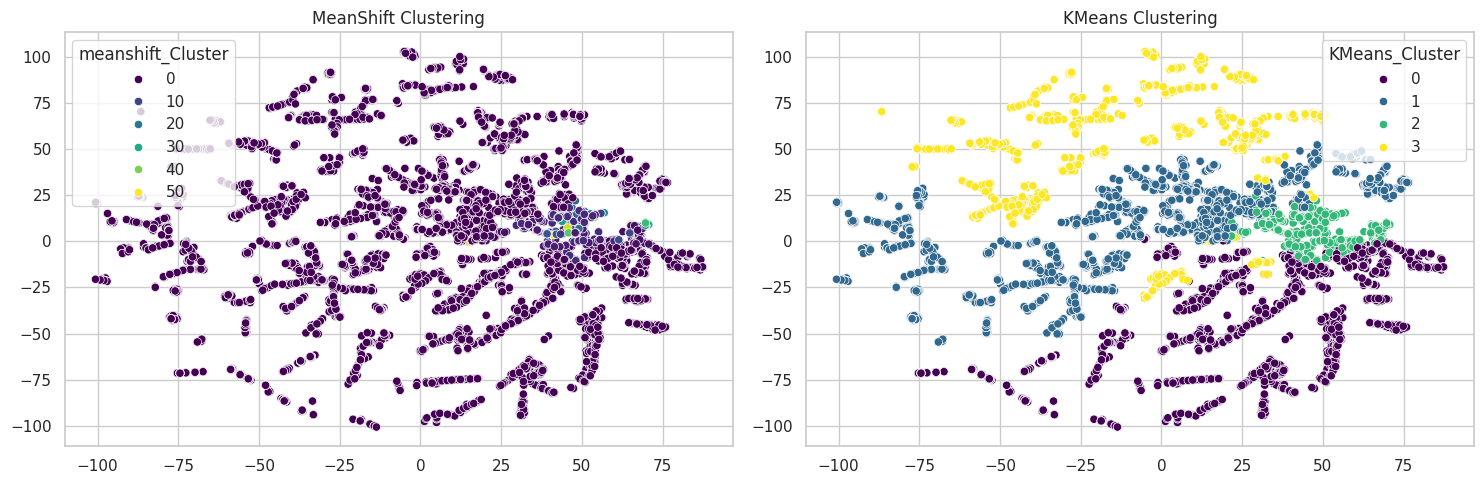

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for MeanShift Clustering
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], \
                hue=df['meanshift_Cluster'], palette='viridis', ax=axes[0])
axes[0].set_title('MeanShift Clustering')

# Scatter plot for KMeans Clustering
sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], \
                hue=df['KMeans_Cluster'], palette='viridis', ax=axes[1])
axes[1].set_title('KMeans Clustering')

plt.tight_layout()
plt.show()

K-Means:
---
**Method**: Partitioning

**Strengths**:
Simple and efficient.
Works well for spherical clusters.

**Weaknesses**:
Assumes equal-sized clusters.
Sensitive to initial centroids.

**Use Case**: Image compression, customer segmentation.

---

MeanShift:
---
**Method**: Density-based

**Strengths**:
Automatically determines the number of clusters.
Works well with irregularly shaped clusters.

**Weaknesses**:
Computationally expensive.
Sensitive to bandwidth parameter.

**Use Case**: Object tracking, image segmentation.

---



---
# After thorough evaluation based on key metrics, here is the summary:

**Silhouette Score**:

MeanShift: 0.467

KMeans: 0.399

**Davies-Bouldin Index**:

MeanShift: 0.683 (lowest)

KMeans: 1.047 (highest)

While MeanShift outperforms KMeans in both the Silhouette Score and Davies-Bouldin Index, I am inclined to choose KMeans for the following reasons:

**Scalability**:

KMeans is computationally more efficient and scalable to larger datasets, aligning with the practical constraints of our project.

**Interpretability**:

KMeans produces non-overlapping clusters, which can enhance interpretability. This is particularly valuable for conveying results and insights.

**Centroid-Based Nature**:

Our preliminary analysis suggests that our data might have well-defined cluster centers, making KMeans a suitable choice.

**Parameter Sensitivity**:

KMeans is less sensitive to hyperparameters compared to MeanShift, which requires careful tuning of the bandwidth parameter.
While MeanShift has demonstrated superior clustering performance based on the metrics, the practical considerations and interpretability aspects lead me to recommend KMeans for our specific use case.

I would appreciate your thoughts and any additional insights you may have on this matter.

---

### Histograms to visually explore the relationships between features within each **KMeans** cluster

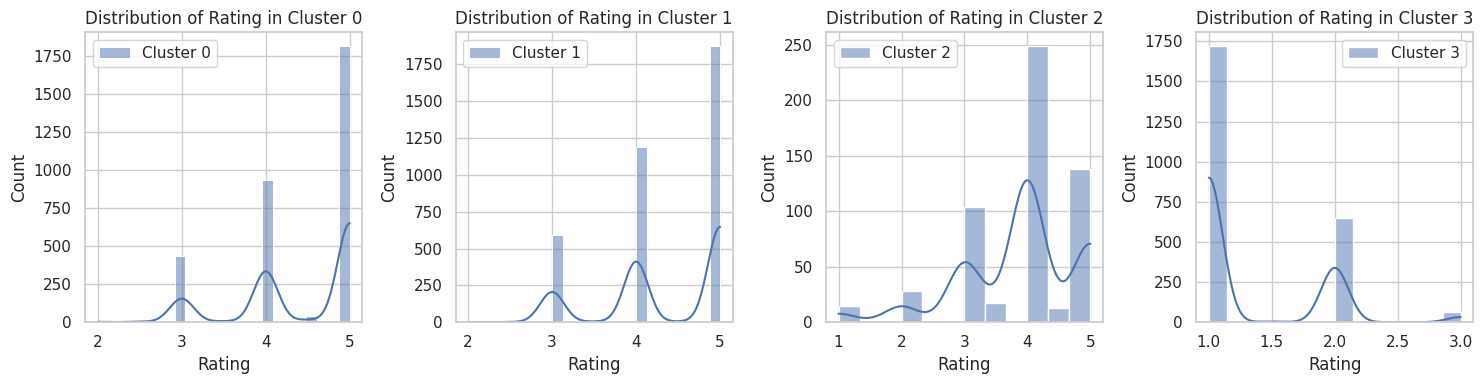

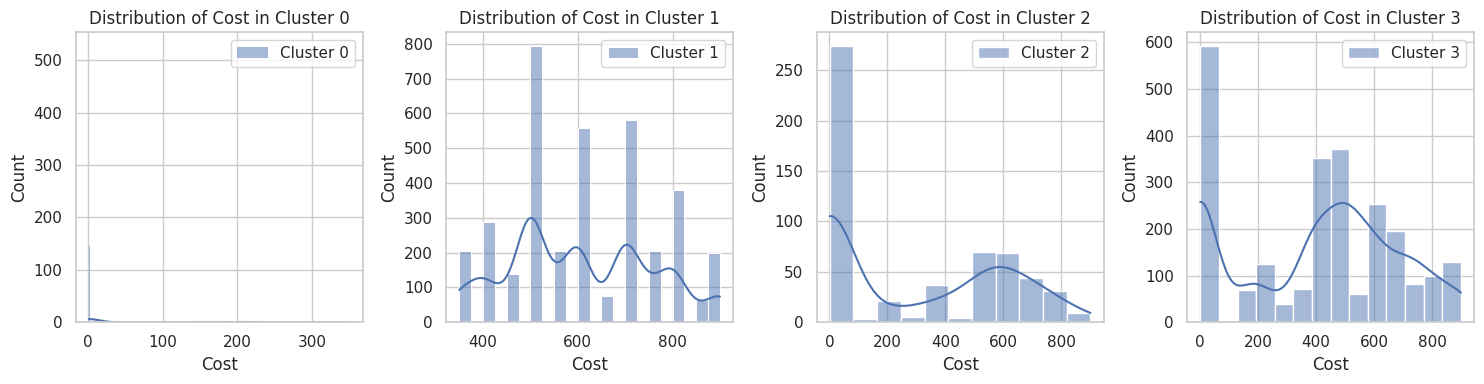

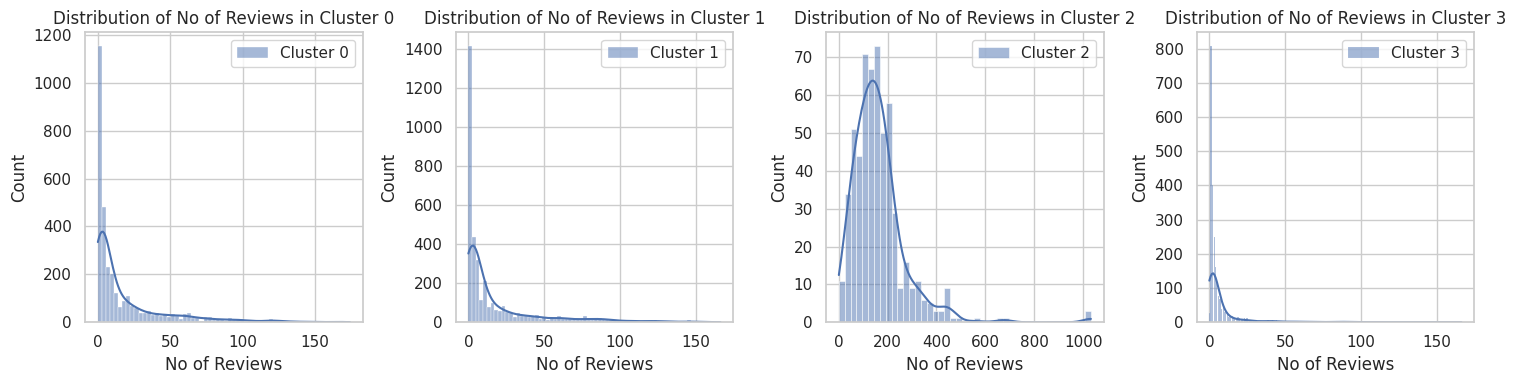

In [ ]:
sns.set(style="whitegrid")

# Features of interest
numerical_feature = ['Rating', 'Cost', 'No of Reviews']

for feature in numerical_feature:
  # Create a figure with 1 row and 4 columns
  fig, axes = plt.subplots(1, 4, figsize=(15, 4))

  # Loop through clusters and create histograms
  for cluster in range(4):
      cluster_data = df[df['KMeans_Cluster'] == cluster]
      sns.histplot(data=cluster_data[feature], kde=True, \
                   label=f'Cluster {cluster}', ax=axes[cluster])

      axes[cluster].legend()
      axes[cluster].set_title(f'Distribution of {feature} in Cluster {cluster}')
      axes[cluster].set_xlabel(feature)

  plt.tight_layout()
  plt.show()